In [12]:
pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
import numpy as np

In [14]:
dataset = od.download(
    "https://www.kaggle.com/datasets/arjuntejaswi/plant-village")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mominulislamayan
Your Kaggle Key: ··········


100%|██████████| 329M/329M [00:04<00:00, 77.4MB/s]


Deleting the Extra folders that we dont need

In [17]:
import shutil

shutil.rmtree('/content/PlantVillage/Pepper__bell___Bacterial_spot', ignore_errors=True)

shutil.rmtree('/content/PlantVillage/Pepper__bell___healthy', ignore_errors=True)

shutil.rmtree('/content/PlantVillage/Tomato_Early_blight', ignore_errors=True)

shutil.rmtree('/content/PlantVillage/Tomato_Late_blight', ignore_errors=True)

shutil.rmtree('/content/PlantVillage/Tomato_Leaf_Mold', ignore_errors=True)

shutil.rmtree('/content/PlantVillage/Tomato_Septoria_leaf_spot', ignore_errors=True)

shutil.rmtree('/content/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite', ignore_errors=True)

shutil.rmtree('/content/PlantVillage/Tomato__Target_Spot', ignore_errors=True)

shutil.rmtree('/content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus', ignore_errors=True)

shutil.rmtree('/content/PlantVillage/Tomato__Tomato_mosaic_virus', ignore_errors=True)

shutil.rmtree('/content/PlantVillage/Tomato_healthy', ignore_errors=True)

shutil.rmtree('/content/PlantVillage/Tomato_Bacterial_spot', ignore_errors=True)


In [18]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/PlantVillage',
    shuffle=True,
    image_size = (256,256),
    batch_size = 32


)

Found 2152 files belonging to 3 classes.


In [19]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [20]:
len(dataset)

68

In [21]:
len(dataset)*32

2176

In [22]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 0 0 1 1 2 1 1 2 0 1 1 1 1 0 2 0 0 0 0 1 1 0 0 1 1 1 0 0 0]


(256, 256, 3)


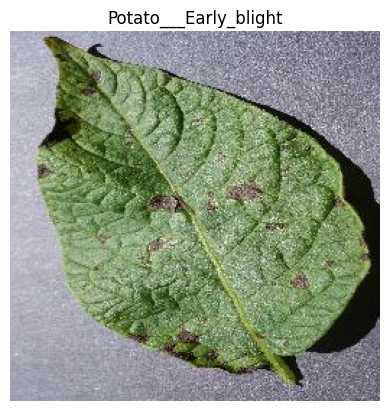

In [23]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)
    plt.axis('off')
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])

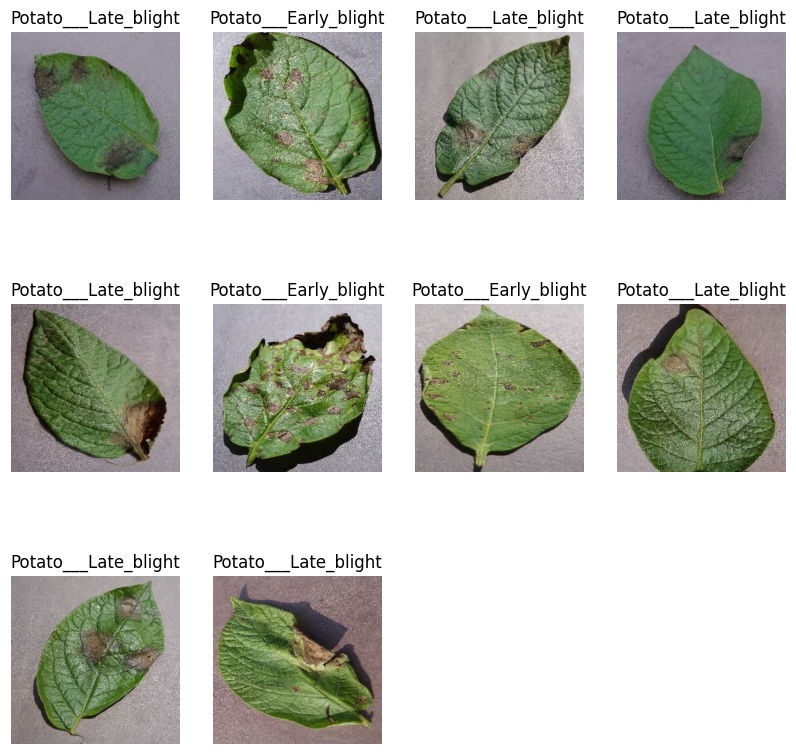

In [24]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range(10):
    ax = plt.subplot(3,4,i+1)
    plt.axis('off')
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])

# 80% ==>training

# 20% ==>10% in validation,10% in test



In [25]:
len(dataset)

68

In [26]:
EPOCHS = 50

In [27]:
def get_dataset_partition_tf(dataset,train_split,val_split,test_split,shuffle=10000):

  dataset_size = len(dataset)

  if shuffle:
    dataset = dataset.shuffle(shuffle,seed=21)


  train_size = int(dataset_size*train_split)
  validation_size = int(val_split*dataset_size)

  train_dataset = dataset.take(train_size)
  validation_dataset = dataset.skip(train_size).take(validation_size)
  test_dataset = dataset.skip(train_size).skip(validation_size)

  return train_dataset,validation_dataset,test_dataset


In [28]:
train_ds , val_ds, test_ds = get_dataset_partition_tf(dataset,0.8,0.1,0.1)

In [29]:
len(train_ds),len(val_ds),len(test_ds)

(54, 6, 8)

In [30]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [31]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/256),
])

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [32]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,256,256,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),


    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax')

    ])

model.build((32,256,256,3))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [34]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [35]:
history = model.fit(train_ds,epochs=30,batch_size=32,verbose=1,validation_data=val_ds)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


54/54 [==============================] - 22s 129ms/step - loss: 0.8880 - accuracy: 0.5252 - val_loss: 0.7613 - val_accuracy: 0.6562
Epoch 2/30
54/54 [==============================] - 4s 69ms/step - loss: 0.6080 - accuracy: 0.7353 - val_loss: 0.2909 - val_accuracy: 0.8854
Epoch 3/30
54/54 [==============================] - 4s 66ms/step - loss: 0.3808 - accuracy: 0.8392 - val_loss: 0.3223 - val_accuracy: 0.8646
Epoch 4/30
54/54 [==============================] - 4s 73ms/step - loss: 0.2626 - accuracy: 0.8944 - val_loss: 0.1319 - val_accuracy: 0.9375
Epoch 5/30
54/54 [==============================] - 4s 74ms/step - loss: 0.1846 - accuracy: 0.9225 - val_loss: 0.2012 - val_accuracy: 0.9323
Epoch 6/30
54/54 [==============================] - 4s 72ms/step - loss: 0.1761 - accuracy: 0.9302 - val_loss: 0.1088 - val_accuracy: 0.9635
Epoch 7/30
54/54 [==============================] - 4s 69ms/step - loss: 0.1267 - accuracy: 0.9478 - val_loss: 0.1264 - val_accuracy: 0.9635
Epoch 8/30
54/54 [====

In [36]:
scores = model.evaluate(test_ds)

54/54 [==============================] - 1s 25ms/step - loss: 0.0654 - accuracy: 0.9707


In [37]:
history

In [38]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

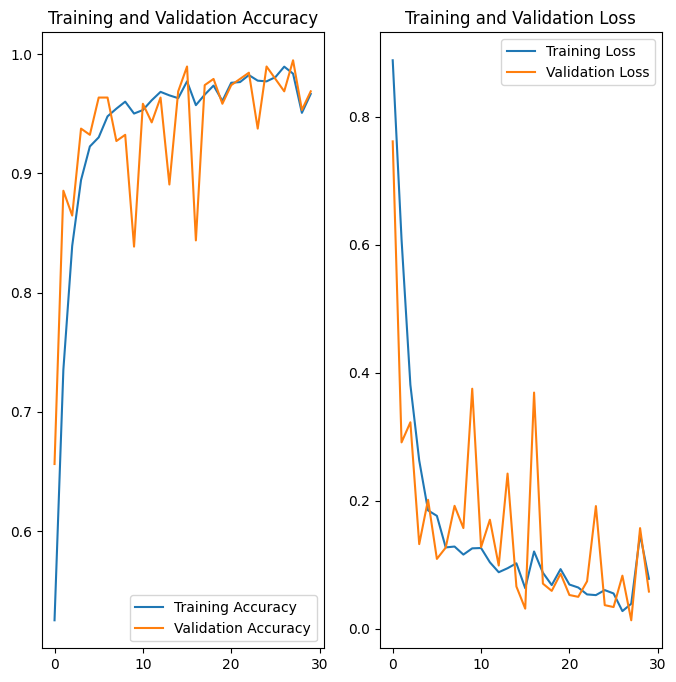

In [45]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(30), acc, label='Training Accuracy')
plt.plot(range(30), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(30), loss, label='Training Loss')
plt.plot(range(30), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual lable :  Potato___Early_blight
1/1 [==============================] - 0s 148ms/step
predicted lable :  Potato___Early_blight
1/1 [==============================] - 0s 30ms/step
[0.01174871 0.9867105  0.00154082]


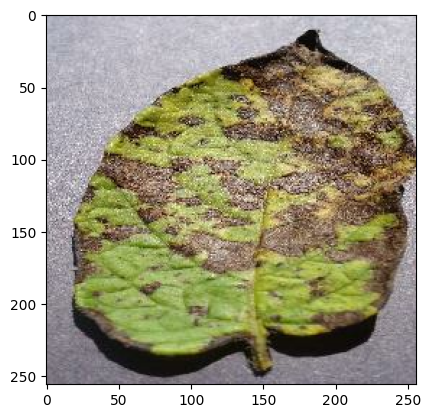

In [46]:
for images_batch,labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_image_label = labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual lable : ", class_names[first_image_label])

  print("predicted lable : ", class_names[np.argmax(model.predict(images_batch)[0])])
  print(model.predict(images_batch)[10])


In [48]:
model.save("/content/drive/MyDrive/AllMachineLearningModels")


In [50]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/AllMachineLearningModels")

In [51]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                 